# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [306]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [307]:
# Read in the data set
ames_df = pd.read_csv("ames.csv")
ames_df.head()
ames_df.tail()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
2925,1984,1984,1003,1003,0,1003,1,0,3,1,6,0,588,142500
2926,1983,1983,864,902,0,902,1,0,2,1,5,0,484,131000
2927,1992,1992,912,970,0,970,1,0,3,1,6,0,0,132000
2928,1974,1975,1389,1389,0,1389,1,0,2,1,6,1,418,170000
2929,1993,1994,996,996,1004,2000,2,1,3,1,9,1,650,188000


In [308]:
# Clean and pre-process the data if neccessary
ames_df.describe()
ames_df.info()

# Check the percentage of missing values per column
missing_values = ames_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB
Series([], dtype: float64)


We can see there are no columns which have missing or NaN values. Even though the first two columns are years, we do not need to convert them. So no further pre-processing required.

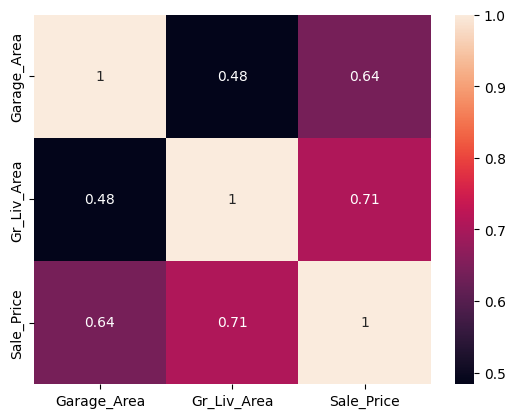

<Axes: xlabel='Garage_Area', ylabel='Count'>

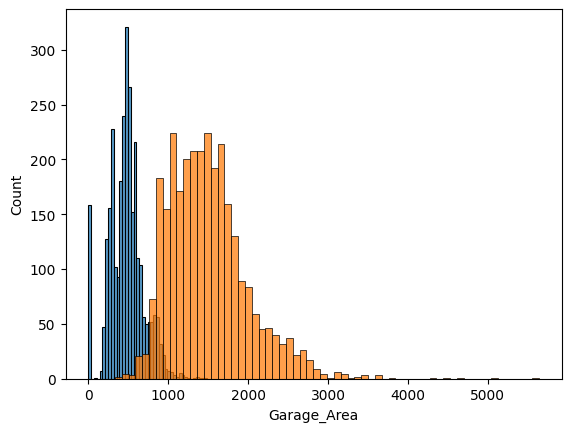

In [309]:
# Explore the data with visualisations such as histograms and correlation matrices

# Correlation matrix between first floor square footage, full bath and sale price
ga_gla_saleprice = ames_df[['Garage_Area', 'Gr_Liv_Area', 'Sale_Price']]
plt.figure()
corr_coeff_mat = ga_gla_saleprice.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.show()
plt.close()


sns.histplot(ames_df['Garage_Area'])
sns.histplot(ames_df['Gr_Liv_Area'])




We can see a 0.71 (so fairly strong) positive relationship between the sale price and the ground living area, as one would expect. Intriguingly not as strong as correlation between Garage Area and ground living area. Perhaps that is a trade off in a living situation. We can also see that the histograms for Garage Area and ground living area are distributed in a Gaussian manner.

In [310]:
# Split the independent variables from the dependent variable

X = ames_df.drop(columns=['Sale_Price'])
Y = ames_df['Sale_Price']

In [311]:
# Explore relationships between the independent and dependent variables

# Observe correlations between variables and Sale Price
correlations = X.corrwith(Y)
correlation_df = correlations.sort_values(ascending=False).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Sale_Price']
print(correlation_df.head(10))

# Standardize and observe coefficients of variables in relation to Sale Price

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sales_model =LinearRegression()
sales_model.fit(X_scaled,Y)

print("Model Coefficient is: ", sales_model.coef_)
print("Model intercept is: ", sales_model.intercept_)

          Feature  Correlation with Sale_Price
0     Gr_Liv_Area                     0.706780
1     Garage_Area                     0.640138
2   Total_Bsmt_SF                     0.632529
3    First_Flr_SF                     0.621676
4      Year_Built                     0.558426
5       Full_Bath                     0.545604
6  Year_Remod_Add                     0.532974
7   TotRms_AbvGrd                     0.495474
8      Fireplaces                     0.474558
9       Half_Bath                     0.285056
Model Coefficient is:  [ 13840.50545455  10075.82043283  15638.82222189  24116.29885611
  25265.20083361   4528.00587317    360.08134853  -1070.37678094
 -10132.42787448  -8024.04537985   7076.64999419   7402.45955387
  11671.77441934]
Model intercept is:  180796.06006825945


We can see strong positive correlations between key variables and sale price.

In [312]:
# Create a training and test set with a 75:25 split ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=False)

print("X_train {}".format(X_train))
print("X_test {}".format(X_test))
print("Y_train {}".format(Y_train))
print("Y_test {}".format(Y_test))

X_train       Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0           1960            1960           1080          1656              0   
1           1961            1961            882           896              0   
2           1958            1958           1329          1329              0   
3           1968            1968           2110          2110              0   
4           1997            1998            928           928            701   
...          ...             ...            ...           ...            ...   
2192        1955            1955            864           864              0   
2193        1954            1954            948           948              0   
2194        1914            1995           1440          1440           1440   
2195        1923            1950           1296          1296           1296   
2196        1923            1996            602           900            602   

      Gr_Liv_Area  Full_Bath  H

In [313]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [314]:
# Print the model intercept and coefficients

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 4.68880273e+02  5.40469527e+02  3.62374136e+01  7.06809030e+01
  6.74786049e+01 -8.54178646e+00  2.25826761e+02 -2.06674136e+03
 -9.66862728e+03 -3.37478138e+04  4.59495883e+03  1.16944410e+04
  5.92859021e+01]
Intercept: -1947954.9187928834


In [315]:
# Generate predictions for the test set

Y_pred = model.predict(X_test)
median_prediction = np.median(Y_pred)
print("Median value of the predictions:", median_prediction)

Median value of the predictions: 169171.19447867014


In [316]:
# Evaluate the model by computing MSE on test set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1383918731.043562
R^2 Score: 0.7875572620361213


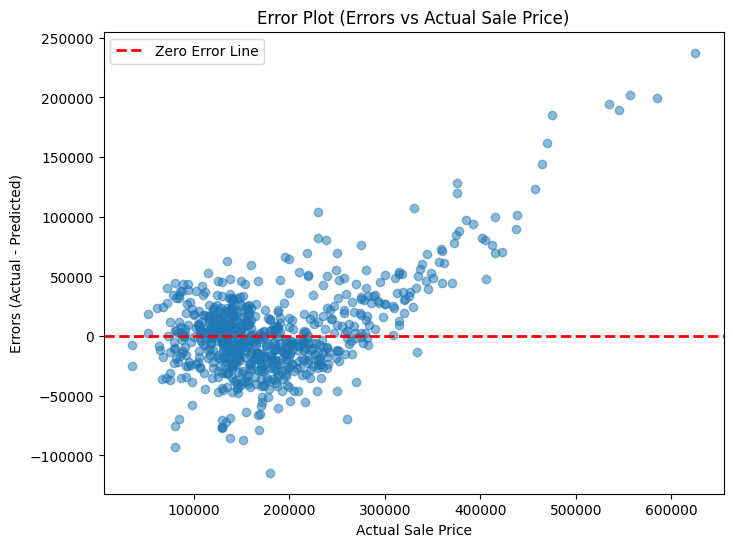

In [317]:
# Generate an error plot to visualise the differences betweeen predicted and actual values in the test set

residuals = Y_test - Y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')
plt.xlabel("Actual Sale Price")
plt.ylabel("Errors (Actual - Predicted)")
plt.title("Error Plot (Errors vs Actual Sale Price)")
plt.legend()
plt.show()

Although different from the example given in the workbook, I believe this to be a simpler and clearer method to visualise the differences betweeen predicted and actual values in the test set. The residuals measure the difference between the actual and predicted values. Positive residuals indicate underprediction (actual > predicted), while negative residuals indicate overprediction (actual < predicted). The residuals are plotted against the actual sale prices to see if there's any pattern in the errors. Ideally, the residuals should be randomly distributed around 0. And as we can see that is true for the msot part, although a slight pattern emerging in errors as our actual sale price increases, so when we see houses selling at the top of the market, our model starts to lose its shape.

In [318]:
# Print the coefficients

print("Coefficients for the independent variables [Gr_Liv_Area, Garage_Area]:", model.coef_)
print("Intercept of the model:", model.intercept_)

Coefficients for the independent variables [Gr_Liv_Area, Garage_Area]: [ 4.68880273e+02  5.40469527e+02  3.62374136e+01  7.06809030e+01
  6.74786049e+01 -8.54178646e+00  2.25826761e+02 -2.06674136e+03
 -9.66862728e+03 -3.37478138e+04  4.59495883e+03  1.16944410e+04
  5.92859021e+01]
Intercept of the model: -1947954.9187928834


**Interpret coefficients in the context of the prediction:**


The coefficients indicate the expected change in the predicted sale price for a one-unit increase in the corresponding independent variable.

From our model:
If the coefficient for Gr_Liv_Area is 468.88, it means:
For every additional square foot of living area, the sale price increases by $468.88.
If the coefficient for Garage_Area is 540.47, it means:
For every additional square foot of garage area, the sale price increases by $540.47

**Summarise findings**

The goal of this analysis was to explore the relationship between 'Gr_Liv_Area' and 'Garage_Area' and house sale prices, and to build a multiple linear regression model to predict sales prices based on these variables.

Our correlation analysis as alluded to earlier, showed strong positive correlation between these variables and sale price. We identified they were normalyy distributed and visualized it.

We undertook a multiple linear regression model using a 75:25 train-test split to evaluate model performance on unseen data. 
The R squared value indicates that 78% of the variability in the sale prices is explained by the independent variables (Gr_Liv_Area and Garage_Area) in the model.
This means the model captures the majority of the important patterns in the data but leaves 22% of the variability unexplained, which could be due to other factors/variables not included.

It appears the area to focus on improving our model is when tthe house prices reach the higher ends, we see a larger gap between expected and actual prices, so that is where improvements should be made.